# DSCI 503 - Homework 07
### Felix Asare

In [1]:
# Import numpy, pandas, and matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import LinearRegression, LogisticRegression, and train_test_split from sklearn.
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split


## Problem 1: NYC Restaurants Dataset

In [2]:
# Loading the nyc data

nyc = pd.read_csv('nyc.txt', sep='\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
# Create a 2D feature array named X1 containing the relevant features, as well as a 1D label array named y1 containing the labels.
X1 = nyc.iloc[:,1:].values
y1 = nyc.iloc[:,0].values

# Use train_test_split() to split the data into training and testing sets 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

#Printing the shapes of the training and testing sets
print("Training Features Shape: ", X_train_1.shape)
print("Test Features Shape:     ", X_test_1.shape)



Training Features Shape:  (134, 5)
Test Features Shape:      (34, 5)


In [4]:
# Create a linear regression model named nyc_mod and then fit it to the training data.
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

# Display the intercepts and coefficients for the final model with text labels
print("Intercept:    ", nyc_mod.intercept_)
print("Coefficients: ", nyc_mod.coef_)

Intercept:     -23.755435322488836
Coefficients:  [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [5]:
# Calculate and print the training and testing r-squared values for your model, rounded to four decimal places.
train_r2 = nyc_mod.score(X_train_1, y_train_1)
test_r2 = nyc_mod.score(X_test_1, y_test_1)
print("Training r-Squared: ", round(train_r2, 4))
print("Testing r-Squared:  ", round(test_r2, 4))


Training r-Squared:  0.6306
Testing r-Squared:   0.6245


In [6]:
# Use your model to generate price estimates based on the feature values in the test set
test_pred_1 = nyc_mod.predict(X_test_1)

# Print the first 10 observed y-values for the test set, and then the first 10 predictions, rounded to two decimal places.
print("Observed Prices: ", y_test_1[:10])
print("Estimated Prices:", np.round(test_pred_1[:10], 2))

Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [7]:
# Create a DataFrame named nyc_new that contains the feature values for these 3 restaurants.
nyc_new = np.array([
    [22, 12, 20, 15, 0], 
    [18, 19, 22, 34, 1], 
    [25, 22, 18, 36, 0] 
])

# Use your model to generate price estimates for these 3 restaurants.
new_pred_1 = nyc_mod.predict(nyc_new)

# Print the estimated prices for these 3 restaurants, rounded to two decimal places.
print("Estimated Prices: ", np.round(new_pred_1, 2))

Estimated Prices:  [30.87 42.57 58.06]


## Problem 2: Diamonds Dataset

In [8]:
# Loading the diamonds data
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Adding 2 new columns ln_carat and ln_price to the diamonds DataFrame
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

#Printing the first 5 rows of the diamonds DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


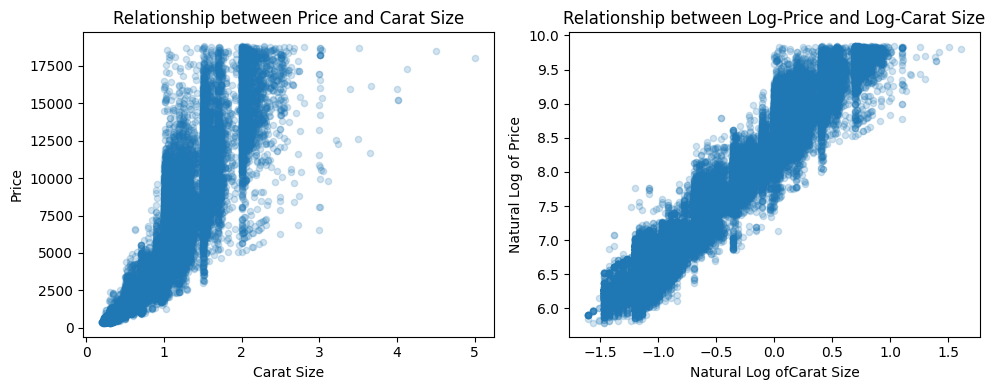

In [10]:
# Create two side-by-side scatterplots. The first scatter plot should display the relationship between carat and price, while the second scatterplot should display the relationship between the transformed variables.
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(diamonds['carat'], diamonds['price'], s=20, alpha=0.2)
axs[0].set_title('Relationship between Price and Carat Size')
axs[0].set_xlabel('Carat Size')
axs[0].set_ylabel('Price')
axs[1].scatter(diamonds['ln_carat'], diamonds['ln_price'], s=20, alpha=0.2)
axs[1].set_title('Relationship between Log-Price and Log-Carat Size')
axs[1].set_xlabel('Natural Log ofCarat Size')
axs[1].set_ylabel('Natural Log of Price')
plt.tight_layout()
plt.show()

In [11]:
# Create a 2D feature array named X2 containing ln_price using ln_carat as features, as well as a 1D label array named y2
X2 = diamonds['ln_carat'].values
y2 = diamonds['ln_price'].values

# Use train_test_split() to split the data into training and testing sets 90% training and 10% testing
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.1, random_state=1)

#Printing the shapes of the training and testing sets
print("Training Features Shape: ", X_train_2.shape)
print("Test Features Shape:     ", X_test_2.shape)

Training Features Shape:  (48546,)
Test Features Shape:      (5394,)


In [12]:
# Create a linear regression model named dia_mod and then fit it to the training data.
dia_mod = LinearRegression()
dia_mod.fit(X_train_2.reshape(-1, 1), y_train_2)

# Display the intercepts and coefficients for the final model with text labels
print("Intercept:    ", dia_mod.intercept_)
print("Coefficients: ", dia_mod.coef_)



Intercept:     8.44829862117915
Coefficients:  [1.67493107]


In [13]:
# Calculate and print the training and testing r-squared values for your model, rounded to four decimal places.
train_r2 = dia_mod.score(X_train_2.reshape(-1, 1), y_train_2)
test_r2 = dia_mod.score(X_test_2.reshape(-1, 1), y_test_2)
print("Training r-Squared: ", round(train_r2, 4))
print("Testing r-Squared:  ", round(test_r2, 4))

Training r-Squared:  0.933
Testing r-Squared:   0.9328


In [14]:
# Use your model to generate price estimates based on the feature values in the test set
test_pred_2 = dia_mod.predict(X_test_2.reshape(-1, 1))

#printing the first 10 observed y-values for the test set, and then the first 10 predictions, rounded to the nearest number.
print("Observed Prices: ", np.round(np.exp(y_test_2[:10]), 0))
print("Estimated Prices:", np.round(np.exp(test_pred_2[:10]), 0))

Observed Prices:  [ 564. 5914. 2562.  537. 5964.  984. 5247.  611. 9645. 1162.]
Estimated Prices: [ 729. 6334. 2096.  766. 6334. 1612. 5309. 1048. 9204.  804.]


In [15]:
# Create a 2D column array named diamonds_new to store the natural logarithm of the carat size 0.5, 1.0, 1.5, 2.0, 2.5, 3.0
diamonds_new = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

# Using model to predict diamonds_new
new_pred_2 = dia_mod.predict(diamonds_new.reshape(-1, 1))

# Print predicted prices for the diamonds_new, rounded to the nearest dollar.
print("Estimated Prices: ", np.round(np.exp(new_pred_2), 0))

Estimated Prices:  [ 10783.  24915.  57566. 133007. 307314. 710051.]


## Problem 3: Heart Disease Dataset

In [16]:
# Loading the heart_disease data
heart_disease = pd.read_csv('heart_disease.txt', sep='\t')
heart_disease.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [17]:
# Create a 2D feature array named X3 containing the relevant features, as well as a 1D label array named y3 containing the labels.
X3 = heart_disease.iloc[:,:-1].values
y3 = heart_disease.iloc[:,-1].values


In [18]:
# Use train_test_split() to split the data into training and testing sets using an 80/20 split. 
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=1, stratify=y3)

#Printing the shapes of the training and testing sets
print("Training Features Shape: ", X_train_3.shape)
print("Test Features Shape:     ", X_test_3.shape)


Training Features Shape:  (216, 13)
Test Features Shape:      (54, 13)


In [19]:
# Create a logistic regression model named hd_mod with solver='lbfgs' and penalty='none'.
hd_mod = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)

# Fit the model to the training data.
hd_mod.fit(X_train_3, y_train_3)

LogisticRegression(max_iter=1000)

In [20]:
# Display the intercepts and coefficients for the final model with text labels 
print("Intercept:    ", hd_mod.intercept_)
print("Coefficients: \n", hd_mod.coef_)

Intercept:     [-8.24457537]
Coefficients: 
 [[-0.03272091  1.28823041  0.70130785  0.02154868  0.01211051 -0.4206115
   0.33156954 -0.01950024  0.57993976  0.37993184  0.18873249  0.94574263
   0.41115898]]


In [21]:
# Calculate and print the training and testing accuracy scores for your model, rounded to four decimal places. 
train_acc = hd_mod.score(X_train_3, y_train_3)
test_acc = hd_mod.score(X_test_3, y_test_3)
print("Training Accuracy: ", round(train_acc, 4))
print("Testing Accuracy:  ", round(test_acc, 4))

Training Accuracy:  0.8565
Testing Accuracy:   0.8148


In [22]:
# Use your model to generate label predictions for observations in the test set. Store in a variable named test_pred_3.
test_pred_3 = hd_mod.predict(X_test_3)

# Print the first 20 observed labels for the test set, and then the first 20 predicted labels.
print("Observed Labels: ", y_test_3[:20])
print("Predicted Labels:", test_pred_3[:20])

Observed Labels:  [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Predicted Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]


In [23]:
# Use the predict_proba() method of your model to estimate probabilities of being in each of the two classes for each in dividual in the test set. 
test_prob_3 = hd_mod.predict_proba(X_test_3)

# Display the predicted probabilities for the first 10 observations in the test set as a DataFrame with the columns named according to the labels that they represent (1 and 2).
print(pd.DataFrame(test_prob_3[:10], columns=['1', '2']))


          1         2
0  0.021211  0.978789
1  0.053512  0.946488
2  0.045840  0.954160
3  0.860618  0.139382
4  0.875003  0.124997
5  0.071442  0.928558
6  0.930170  0.069830
7  0.924971  0.075029
8  0.016324  0.983676
9  0.993589  0.006411


## Problem 4: Gapminder Dataset

In [24]:
# Loading the gapminder data

gm = pd.read_csv('gapminder_data.txt', sep='\t')

# Filter the DataFrame, keeping only the 2018 results  storing the results in a DataFrame named gm18
gm18 = gm[gm['year'] == 2018]

# Printing 10 rows of the gm18 DataFrame
gm18.head(10)
# gm18.shape

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [25]:
# Create a 2D feature array named X4 containing the relevant features, as well as a 1D label array named y4 containing the labels.
X4 = gm18[['life_exp', 'gdp_per_cap', 'gini']].values
y4 = gm18['continent'].values

# Use train_test_split() to split the data into training and testing sets using an 70/30 split. 
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size=0.3, random_state=1, stratify=y4)

#Printing the shapes of the training and testing sets
print("Training Features Shape: ", X_train_4.shape)
print("Test Features Shape:     ", X_test_4.shape)

Training Features Shape:  (128, 3)
Test Features Shape:      (56, 3)


In [26]:
# Create a logistic regression model named gm_mod with the following parameter vakues: solver='lbfgs', penalty='none', and multi_class='multinomial'
gm_mod = LogisticRegression(solver='lbfgs', penalty='l2', multi_class='multinomial', max_iter=1000)

# Fit the model to the training data.
gm_mod.fit(X_train_4, y_train_4)

# Display the intercepts and coefficients for the final model with text labels
print("Intercepts: ", gm_mod.intercept_)
print("Coefficients: \n", gm_mod.coef_)

Intercepts:  [ 0.00204203 -0.00470401  0.00330181 -0.00063984]
Coefficients: 
 [[-8.77062420e-02 -1.02831358e-04  1.99760840e-01]
 [-8.56503807e-02  3.30058296e-05  1.58644152e-01]
 [ 1.91300756e-02  2.94861826e-05 -2.30227246e-02]
 [ 1.54226547e-01  4.03393454e-05 -3.35382267e-01]]


In [27]:
# Calculate and print the training and testing accuracy scores for your model, rounded to four decimal places
train_acc = gm_mod.score(X_train_4, y_train_4)
test_acc = gm_mod.score(X_test_4, y_test_4)
print("Training Accuracy: ", round(train_acc, 4))
print("Testing Accuracy:  ", round(test_acc, 4))

Training Accuracy:  0.625
Testing Accuracy:   0.5893


In [28]:
# Use your model to generate label predictions for observations in the test set. Store in a variable named test_pred_4.
test_pred_4 = gm_mod.predict(X_test_4)

# Print first 8 observed labels for the test set, and then the first 8 predicted labels.
print("Observed Labels: ", y_test_4[:8])
print("Predicted Labels:", test_pred_4[:8])


Observed Labels:  ['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Predicted Labels: ['asia' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']


In [29]:
# Use the predict_proba() method of your model to estimate probabilities of being in each of the four classes for each individual in the test set. 
test_prob_4 = gm_mod.predict_proba(X_test_4)

# Display the predicted probabilities for the first 8 observations in the test set as a DataFrame with the columns named according to the labels that they represent (Africa, Americas, Asia, Europe).
print(pd.DataFrame(test_prob_4[:8], columns=gm_mod.classes_))

     africa  americas      asia    europe
0  0.066609  0.259704  0.577046  0.096641
1  0.001130  0.044204  0.358314  0.596352
2  0.662159  0.210684  0.123601  0.003556
3  0.227270  0.262003  0.455723  0.055005
4  0.002104  0.005070  0.113471  0.879355
5  0.001891  0.024302  0.253165  0.720642
6  0.629675  0.218800  0.147507  0.004018
7  0.000028  0.000768  0.033744  0.965460


In [30]:
# New data for the gapminder model
data = {
    'life_exp': [75, 75, 75, 75, 75, 75],
    'gdp_per_cap': [5000, 5000, 5000, 20000, 20000, 20000],
    'gini': [30, 40, 50, 30, 40, 50]
}
gm_new = pd.DataFrame(data)


In [31]:
# Pass this DataFrame to the predict_proba() method of your model. Round the estimated probabilities to 3 decimal places.
new_prob_4 = gm_mod.predict_proba(gm_new)

# Display the predicted probabilities for the new data as a DataFrame with the columns named according to the labels that they represent (Africa, Americas, Asia, Europe).
print(pd.DataFrame(new_prob_4, columns=gm_mod.classes_))

     africa  americas      asia    europe
0  0.039209  0.026103  0.287429  0.647260
1  0.432989  0.191077  0.342045  0.033890
2  0.725677  0.212279  0.061775  0.000269
3  0.004979  0.025432  0.265639  0.703950
4  0.092553  0.313343  0.532067  0.062038
5  0.258606  0.580366  0.160206  0.000822


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


According to our model:
• Country 0 is most likely in Europe

• Country 1 is most likely in Africa

• Country 2 is most likely in Africa

• Country 3 is most likely in Europe

• Country 4 is most likely in Africa

• Country 5 is most likely in Americas
